<a href="https://colab.research.google.com/github/MarianoNaveyra/DataScience/blob/main/Proyecto_Partell_Naveyra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abstract:

Este análisis busca detectar los factores claves que influyen en el resultado de un partido de fútbol, tomando como ejemplo la liga inglesa de futbol. Este dataset contiene información detallada sobre partidos de equipos locales y visitantes. Se tienen en cuenta variables como goles, tiros al arco, tarjetas, y faltas para identificar patrones que puedan explicar las diferencias en el rendimiento entre equipos locales y visitantes, así como la relación entre acciones específicas del juego y el resultado final del partido.

Hipótesis:

Los equipos locales tienen más probabilidades de ganar que los equipos visitantes.

La cantidad de tiros al arco está directamente relacionada con el número de goles.


Los equipos visitantes cometen más faltas y reciben más tarjetas que los equipos locales.

Los equipos que terminan el primer tiempo arriba el el marcador, tienen mas chances de ganar el partido.

Preguntas:

¿Cuáles son los factores clave que determinan la victoria de un equipo?

¿Los goles al medio tiempo influyen significativamente en el resultado final del partido?

¿Existen diferencias significativas en el rendimiento de los equipos locales y visitantes?

¿Qué equipo suele realizar más disparos, cometer más faltas o recibir más tarjetas?

¿Existe una relación significativa entre los disparos a puerta y los goles marcados?

¿Es más probable que los equipos que tienen más disparos a puerta marquen más goles?

In [17]:

url = 'https://raw.githubusercontent.com/MarianoNaveyra/DataScience/main/DatasetFutbol.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()



,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [19]:
df['FTHG'] = pd.to_numeric(df['FTHG'], errors='coerce')
df['FTAG'] = pd.to_numeric(df['FTAG'], errors='coerce')
df['HST'] = pd.to_numeric(df['HST'], errors='coerce')
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')

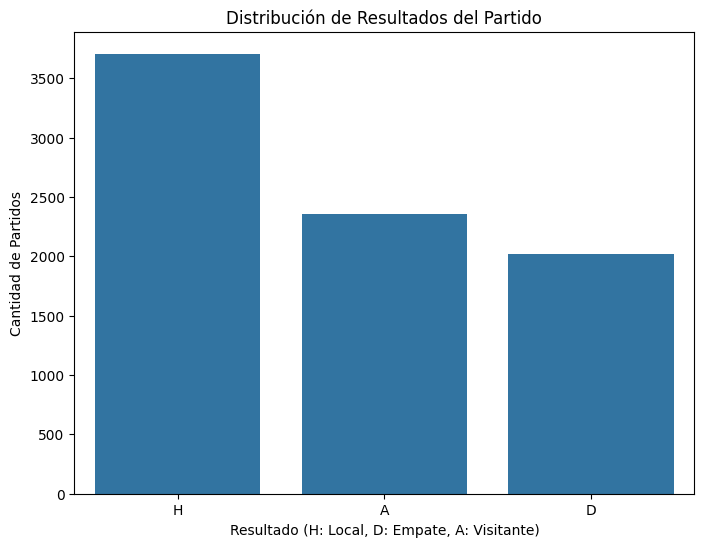

In [31]:
# Gráfico 1: Distribución de los resultados del partido (Local, Empate, Visitante)
plt.figure(figsize=(8,6))
sns.countplot(x='FTR', data=df)  # Sin el argumento palette
plt.title('Distribución de Resultados del Partido')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Cantidad de Partidos')
plt.show()

A partir de este gráfico, la hipótesis de que los equipos locales tienen más probabilidades de ganar que los equipos visitantes está respaldada. El número de victorias locales es considerablemente más alto que el de visitantes, lo que sugiere una ventaja para los equipos que juegan en casa.

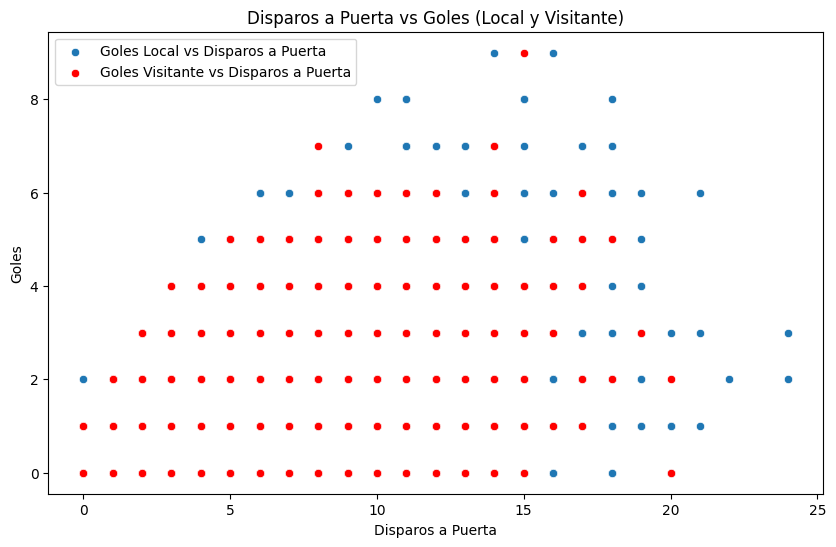

In [21]:
# Gráfico 2: Relación entre los Disparos a Puerta y Goles
plt.figure(figsize=(10,6))
sns.scatterplot(x='HST', y='FTHG', data=df, label='Goles Local vs Disparos a Puerta')
sns.scatterplot(x='AST', y='FTAG', data=df, label='Goles Visitante vs Disparos a Puerta', color='red')
plt.title('Disparos a Puerta vs Goles (Local y Visitante)')
plt.xlabel('Disparos a Puerta')
plt.ylabel('Goles')
plt.legend()
plt.show()

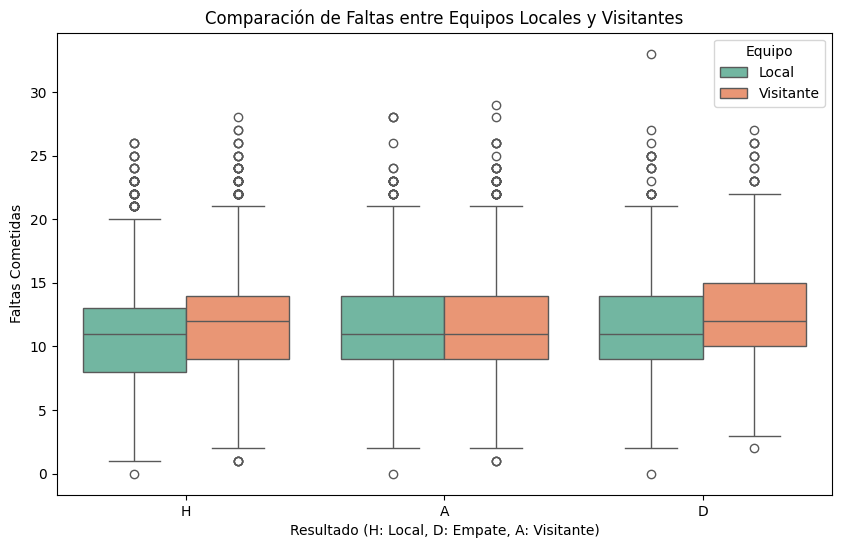

In [32]:
# Crear un DataFrame en formato 'long' para faltas cometidas por local y visitante
df_melted_fouls = df.melt(id_vars=['FTR'], value_vars=['HF', 'AF'],
                           var_name='Equipo', value_name='Faltas Cometidas')

# Etiquetas más descriptivas para 'Equipo'
df_melted_fouls['Equipo'] = df_melted_fouls['Equipo'].replace({'HF': 'Local', 'AF': 'Visitante'})

# Crear gráfico de caja
plt.figure(figsize=(10,6))
sns.boxplot(x='FTR', y='Faltas Cometidas', hue='Equipo', data=df_melted_fouls, palette='Set2')

plt.title('Comparación de Faltas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Faltas Cometidas')
plt.legend(title='Equipo')
plt.show()


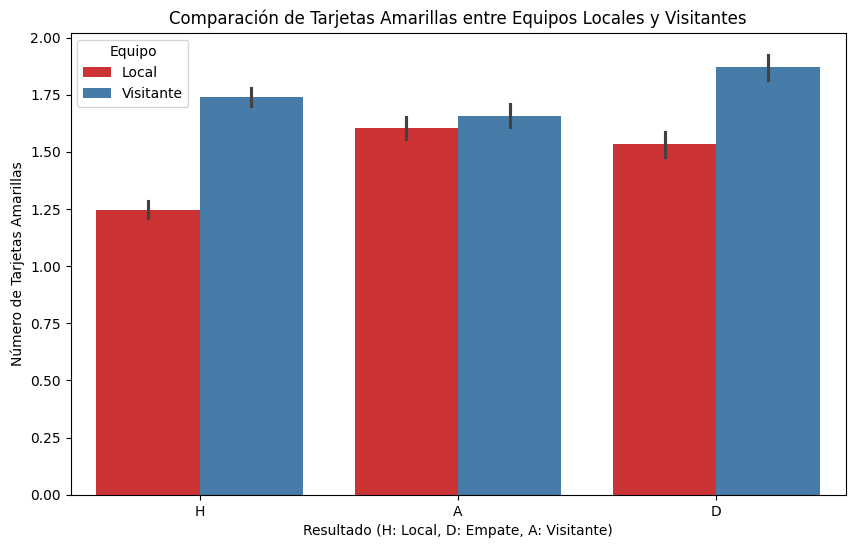

In [33]:
# Crear un DataFrame en formato 'long' para tarjetas amarillas de local y visitante
df_melted = df.melt(id_vars=['FTR'], value_vars=['HY', 'AY'],
                    var_name='Equipo', value_name='Tarjetas Amarillas')

# Etiquetas más descriptivas para 'Equipo'
df_melted['Equipo'] = df_melted['Equipo'].replace({'HY': 'Local', 'AY': 'Visitante'})

# Crear gráfico de barras con hue para separar local y visitante
plt.figure(figsize=(10,6))
sns.barplot(x='FTR', y='Tarjetas Amarillas', hue='Equipo', data=df_melted, palette='Set1')

plt.title('Comparación de Tarjetas Amarillas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Número de Tarjetas Amarillas')
plt.legend(title='Equipo')
plt.show()

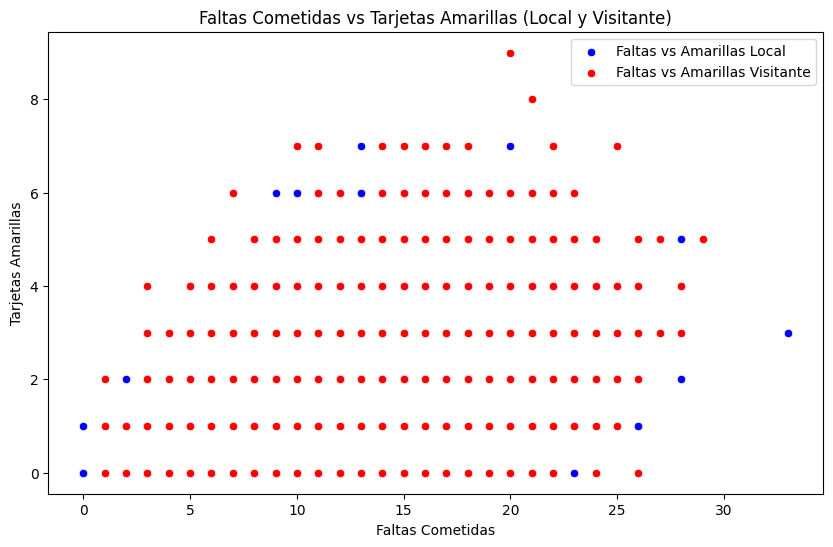

In [30]:
# Gráfico 5: Faltas Cometidas vs Tarjetas Amarillas
plt.figure(figsize=(10,6))
sns.scatterplot(x='HF', y='HY', data=df, label='Faltas vs Amarillas Local', color='blue')
sns.scatterplot(x='AF', y='AY', data=df, label='Faltas vs Amarillas Visitante', color='red')
plt.title('Faltas Cometidas vs Tarjetas Amarillas (Local y Visitante)')
plt.xlabel('Faltas Cometidas')
plt.ylabel('Tarjetas Amarillas')
plt.legend()
plt.show()
